# K - Means 

In [2]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from six import StringIO

from IPython.display import Image
import pydotplus

In [3]:
df=pd.read_csv("C:\\Users\\chara\\Downloads\\Sales_Transactions_Dataset_Weekly.csv")
df.head()

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


In [4]:
data=df.iloc[:,:106]
data

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 41,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50
0,P1,11,12,10,8,13,12,14,21,6,...,0.44,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11
1,P2,7,6,3,2,7,1,6,3,3,...,0.50,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60
2,P3,7,11,8,9,10,8,7,13,12,...,0.18,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45
3,P4,12,8,13,5,9,6,9,13,13,...,0.24,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29
4,P5,8,5,13,11,6,7,9,14,9,...,0.33,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,P815,0,0,1,0,0,2,1,0,0,...,0.00,0.00,0.33,0.33,0.00,0.00,0.33,0.00,0.00,0.67
807,P816,0,1,0,0,1,2,2,6,0,...,1.00,0.43,0.43,0.57,0.29,0.57,0.71,0.71,0.71,0.86
808,P817,1,0,0,0,1,1,2,1,1,...,0.25,0.50,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00
809,P818,0,0,0,1,0,0,0,0,1,...,0.00,0.00,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00


In [8]:
df = pd.DataFrame(data)
y=df.drop(['Product_Code'],axis = 1)
y

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,Normalized 41,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50
0,11,12,10,8,13,12,14,21,6,14,...,0.44,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11
1,7,6,3,2,7,1,6,3,3,3,...,0.50,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60
2,7,11,8,9,10,8,7,13,12,6,...,0.18,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45
3,12,8,13,5,9,6,9,13,13,11,...,0.24,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29
4,8,5,13,11,6,7,9,14,9,9,...,0.33,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,0,0,1,0,0,2,1,0,0,1,...,0.00,0.00,0.33,0.33,0.00,0.00,0.33,0.00,0.00,0.67
807,0,1,0,0,1,2,2,6,0,1,...,1.00,0.43,0.43,0.57,0.29,0.57,0.71,0.71,0.71,0.86
808,1,0,0,0,1,1,2,1,1,0,...,0.25,0.50,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00
809,0,0,0,1,0,0,0,0,1,0,...,0.00,0.00,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00


In [9]:

x=np.array(y)
x

array([[11.  , 12.  , 10.  , ...,  0.22,  0.17,  0.11],
       [ 7.  ,  6.  ,  3.  , ...,  0.5 ,  0.1 ,  0.6 ],
       [ 7.  , 11.  ,  8.  , ...,  1.  ,  0.45,  0.45],
       ...,
       [ 1.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [ 0.  ,  1.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]])

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
y_Kmeans = kmeans.predict(x)
print(y_Kmeans)

[2 1 2 2 2 1 1 2 2 2 2 1 2 2 0 0 0 0 0 2 2 2 1 0 0 2 0 0 2 0 2 2 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 1 0 0 0 0 0 2 0 0 2 0 0 2 0 0 2 0 0 2 0 0 2
 0 0 1 0 0 0 2 2 0 0 0 0 0 0 0 0 2 0 2 2 2 0 0 1 2 2 0 0 2 1 1 2 2 1 2 2 1
 0 0 2 2 2 1 2 0 0 2 2 1 1 2 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 1
 2 1 1 2 2 2 1 1 2 1 1 2 1 2 1 2 2 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 2 2 1 2 1 2 1 1 2 1 1 0 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 0 2 2 1 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 2 1 1
 1 1 2 1 1 1 1 2 1 1 1 1 2 1 1 1 1 2 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 2 2
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 1 1 2 2 2 2 2 2 0
 2 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 2 2 2 1 2 2 2 2 2 2 

In [12]:
print(kmeans.cluster_centers_)

[[33.70967742 35.19354839 36.74193548 38.37096774 36.70967742 35.94354839
  37.74193548 36.81451613 38.01612903 37.32258065 38.27419355 36.43548387
  37.87096774 37.41935484 38.02419355 38.80645161 38.96774194 37.34677419
  38.28225806 36.64516129 37.75806452 36.04032258 36.32258065 35.04032258
  33.         25.80645161 26.43548387 27.36290323 28.78225806 28.50806452
  29.66129032 28.95967742 30.17741935 30.44354839 30.44354839 30.29032258
  30.79032258 30.58064516 31.80645161 30.46774194 31.36290323 31.41129032
  32.09677419 31.73387097 31.78225806 32.5        33.00806452 32.35483871
  31.50806452 30.87903226 28.44354839 24.18548387 17.91935484 51.41129032
   0.47790323  0.52024194  0.56959677  0.61548387  0.56806452  0.54483871
   0.6016129   0.56774194  0.60379032  0.58637097  0.61290323  0.56508065
   0.59830645  0.58596774  0.605       0.62830645  0.63282258  0.58048387
   0.61024194  0.56322581  0.59209677  0.5433871   0.55169355  0.51169355
   0.44774194  0.23354839  0.25056452 

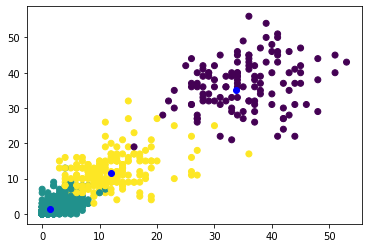

In [20]:
import matplotlib.pyplot as plt
plt.scatter(x[:, 1], x[:, 2], c=y_Kmeans)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],c='blue')

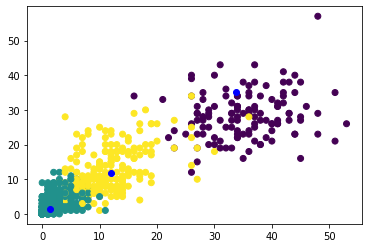

In [21]:
import matplotlib.pyplot as plt
plt.scatter(x[:, 1], x[:, 50], c=y_Kmeans)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],c='blue')

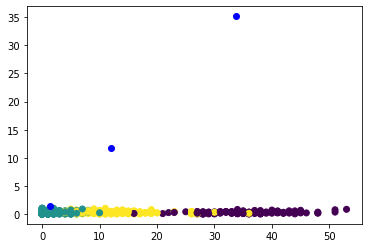

In [22]:
import matplotlib.pyplot as plt
plt.scatter(x[:, 1], x[:, 80], c=y_Kmeans)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],c='blue')

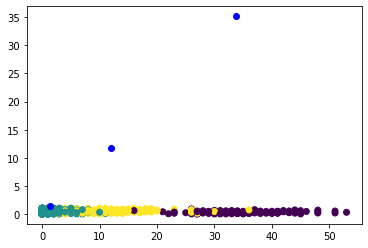

In [24]:
import matplotlib.pyplot as plt
plt.scatter(x[:, 1], x[:, 104], c=y_Kmeans)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],c='blue')